# Проект по ММПО "Индетификация функции фитнеса методами машинного обучения"

In [172]:
import pandas as pd
import numpy as np
from math import pi
import random
from sklearn import preprocessing

## 1.Создание стратегий

In [173]:
C, C0, sigma1, sigma2=120,70,1,1
args=[C,C0,sigma1,sigma2]
N=40
alpha_j=0.0016
alpha_a=0.006
beta_j=0.0000007
beta_a=0.000000075
delta_j=0.000016
delta_a=0.00006
gamma_j=0.00008
gamma_a=0.004

lamb=[alpha_j,alpha_a,beta_j,beta_a,delta_j,delta_a,gamma_j,gamma_a]

def getData ():
    Aj=np.empty(N,dtype=float)
    Bj=np.empty(N,dtype=float)
    Aa=np.empty(N,dtype=float)
    Ba=np.empty(N,dtype=float)

    M1=np.empty(N,dtype=float)
    M2=np.empty(N,dtype=float)
    M3=np.empty(N,dtype=float)
    M4=np.empty(N,dtype=float)
    M5=np.empty(N,dtype=float)
    M6=np.empty(N,dtype=float)
    M7=np.empty(N,dtype=float)
    M8=np.empty(N,dtype=float)
    

    for i in range(0,N):
        Aj[i]=random.uniform(-C, 0)
        Bj[i]=random.uniform(-min(Aj[i]+C,-1*Aj[i]), min(Aj[i]+C,-1*Aj[i]))
        Aa[i]=random.uniform(-C, 0)
        Ba[i]=random.uniform(-min(Aa[i]+C,-1*Aa[i]), min(Aa[i]+C,-1*Aa[i]))

        M1[i]=(sigma1*(Aj[i]+C))
        M2[i]=-(sigma2*(Aj[i]+C+Bj[i]/2))
        M3[i]=-((2*pi)**2)*(Bj[i]**2)/2
        M4[i]=-((Aj[i]+C0)**2+(Bj[i]**2)/2)
        M5[i]=(sigma1*(Aa[i] + C))
        M6[i]=-(sigma2*(Aa[i] + C + Ba[i]/2))
        M7[i]=-((2*pi)**2)*(Ba[i]**2)/2
        M8[i]=-((Aa[i] + C0)**2 + (Ba[i]**2)/2)


    cols=['A_j','B_j','A_a','B_a','M1','M2','M3','M4','M5','M6','M7','M8']
    data = pd.DataFrame({
        cols[0]:Aj,cols[1]:Bj,
        cols[2]:Aa,cols[3]:Ba,
        cols[4]:M1,cols[5]:M2,cols[6]:M3,cols[7]:M4,
        cols[8]:M5,cols[9]:M6,cols[10]:M7,cols[11]:M8
    })
    data_ = pd.DataFrame(data =  data )
    data_.to_csv("data_parameters.csv", index=False)
    return data

ndata=getData()
ndata

,A_j,B_j,A_a,B_a,M1,M2,M3,M4,M5,M6,M7,M8
0,-85.850097,2.505705,-81.718203,8.155571,34.149903,-35.402756,-123.933752,-254.364844,38.281797,-42.359583,-1312.920831,-170.572946
1,-29.050820,19.332373,-15.972669,-5.563525,90.949180,-100.615367,-7377.345000,-1863.705675,104.027331,-101.245568,-610.983898,-2934.428866
2,-11.357536,-9.559741,-84.755442,-8.492372,108.642464,-103.862594,-1803.939725,-3484.632951,35.244558,-30.998372,-1423.599362,-253.783273
3,-24.339205,-4.202674,-39.430086,-15.446977,95.660795,-93.559457,-348.643212,-2093.739394,80.569914,-72.846426,-4709.954894,-1053.824206
4,-105.559685,4.134662,-50.049293,2.023300,14.440315,-16.507646,-337.450202,-1273.038886,69.950707,-70.962356,-80.807214,-400.077567
5,-42.490304,11.494618,-4.181160,-3.666255,77.509696,-83.257005,-2608.067381,-822.846511,115.818840,-113.985712,-265.323164,-4338.840404
6,-60.946929,-41.728500,-119.194521,-0.678759,59.053071,-38.188821,-34371.246541,-952.591937,0.805479,-0.466100,-9.094133,-2420.331228
7,-4.189674,-3.259658,-25.546762,25.467401,115.810326,-114.180497,-209.736375,-4336.311699,94.453238,-107.186938,-12802.623788,-2300.384579
8,-82.294192,34.206040,-48.412843,-2.347434,37.705808,-54.808828,-23095.923884,-736.173735,71.587157,-70.413440,-108.771854,-468.760559
9,-60.054397,39.431992,-7.613563,-3.066527,59.945603,-79.661599,-30692.140187,-876.356010,112.386437,-110.853174,-185.619374,-3896.769354


In [174]:
def get_strategyParam ():
    data_strategyParam=getData().drop(['A_j','B_j','A_a','B_a'], axis=1)
    #data_n=preprocessing.normalize(data_strategyParam, axis=0)
    scaler = preprocessing.MinMaxScaler()
    norm_data = scaler.fit_transform(data_strategyParam)
    names=data_strategyParam.columns
    # cols=['M1','M2','M3','M4','M5','M6','M7','M8']
    data_strategyParam=pd.DataFrame(norm_data,columns=names)
    return data_strategyParam

get_strategyParam ()


,M1,M2,M3,M4,M5,M6,M7,M8
0,0.917908,0.129395,0.957015,0.250242,0.145083,0.921586,0.912387,0.745246
1,0.226983,0.758858,0.998149,0.912434,0.629729,0.199724,0.515994,0.710230
2,0.423512,0.689969,0.671288,0.929330,0.453292,0.677066,0.681543,0.893861
3,0.595273,0.588507,0.164939,0.709902,0.022555,0.955706,0.994648,0.524114
4,0.258787,0.610568,0.595391,0.847630,0.161753,0.781924,0.952249,0.785809
5,0.133391,0.817965,0.953377,0.778900,0.866636,0.135221,0.999456,0.410366
6,0.710873,0.352632,0.908143,0.722579,0.773275,0.091250,0.699580,0.531466
7,0.147369,0.875978,0.980747,0.806931,0.658082,0.186659,0.601203,0.701487
8,0.723452,0.158237,0.632961,0.635238,0.765451,0.184152,0.963441,0.638057
9,0.195450,0.731832,0.883509,0.849567,0.874006,0.129356,0.999066,0.390345


In [175]:
data=get_strategyParam ()
data.loc[1]

M1    0.333004
M2    0.724289
M3    0.940209
M4    0.973598
M5    0.964756
M6    0.024159
M7    0.996034
M8    0.116285
Name: 1, dtype: float64

## 2.Разделение стратегий на классы

In [176]:
def fitness(v):
    return np.dot(v, lamb)

def get_target(v,w):
    if fitness(v)-fitness(w)>0:
        return 1
    return -1

In [177]:
def get_Sample():
    data_arr=get_strategyParam().to_numpy()
    train_data_arr = []
    for i in range(0,len(data_arr)):
        for j in range(i+1,len(data_arr)):
            v=np.empty(8,dtype=float)
            w=np.empty(8,dtype=float)
            # v=(data.iloc[i, :]).to_numpy()
            # w=(data.iloc[j, :]).to_numpy()
            v=data_arr[i,:]
            w=data_arr[j,:]
            str_=[*(v-w), get_target(v,w)]   #должен быть M1,M2,M3,M4,{-1,1}
            train_data_arr.append(str_)
    trainSample=pd.DataFrame(columns=['M1', 'M2', 'M3', 'M4','M5','M6','M7','M8', 'target'], data=train_data_arr)
    data = pd.DataFrame(data =  trainSample )
    data.to_csv("Sample.csv", index=False)
    return trainSample

get_Sample()



,M1,M2,M3,M4,M5,M6,M7,M8,target
0,0.156375,-0.063898,0.254712,-0.083959,0.705015,-0.815074,-0.297980,0.106922,1
1,0.360405,-0.477235,0.137034,-0.119861,0.625540,-0.723952,-0.291001,-0.049986,-1
2,0.546315,-0.623416,0.034209,0.062720,0.151554,-0.121090,0.208625,-0.154374,-1
3,0.137717,-0.242278,0.095457,-0.122563,0.600415,-0.789411,-0.162596,-0.065590,-1
4,0.214919,-0.025425,0.864345,0.085518,-0.066888,-0.092037,-0.229320,0.080081,1
...,...,...,...,...,...,...,...,...,...
775,-0.563403,0.746868,0.733324,-0.060451,-0.390743,0.224805,-0.698333,0.715335,1
776,-0.614194,0.487049,0.231703,-0.154668,0.424338,-0.683434,-0.497496,-0.073270,1
777,0.156421,0.154232,0.503507,-0.090234,-0.036063,0.060425,-0.023033,0.110587,1
778,0.105630,-0.105588,0.001886,-0.184451,0.779019,-0.847814,0.177804,-0.678018,-1


In [178]:
X=get_Sample().loc[:,'M1':'M8']
y=get_Sample().loc[:,'target']

### графики

No handles with labels found to put in legend.


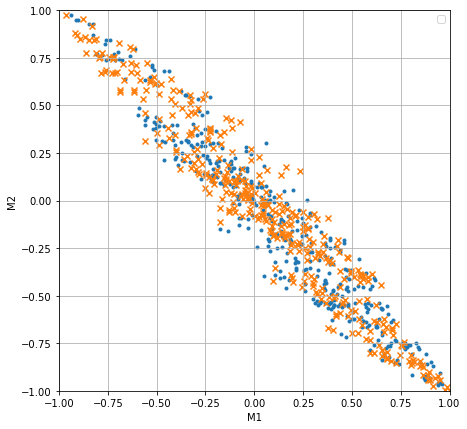

No handles with labels found to put in legend.


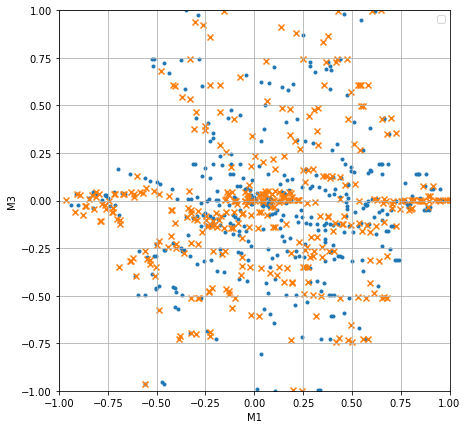

No handles with labels found to put in legend.


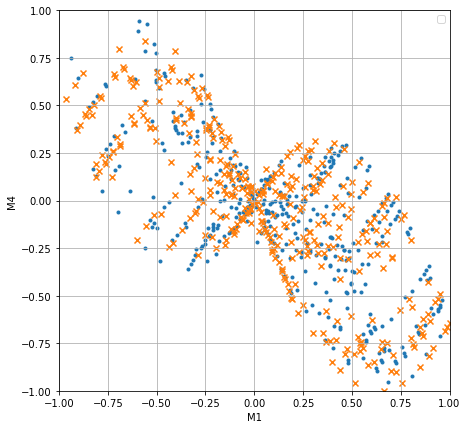

No handles with labels found to put in legend.


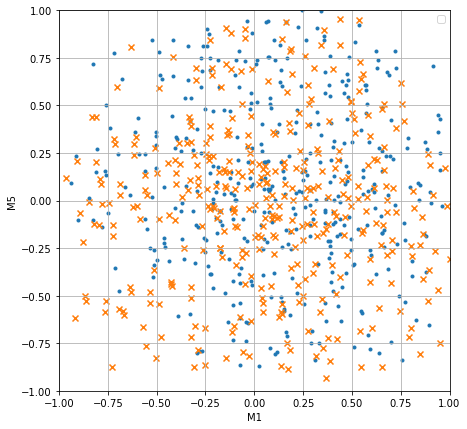

No handles with labels found to put in legend.


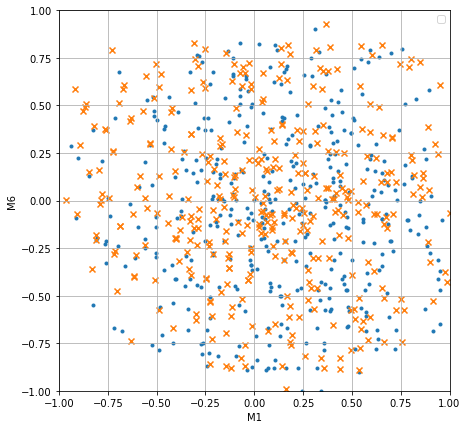

No handles with labels found to put in legend.


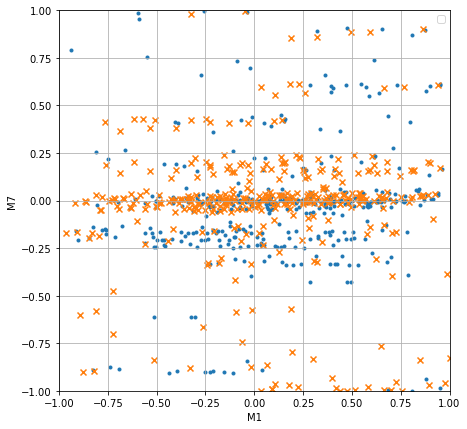

No handles with labels found to put in legend.


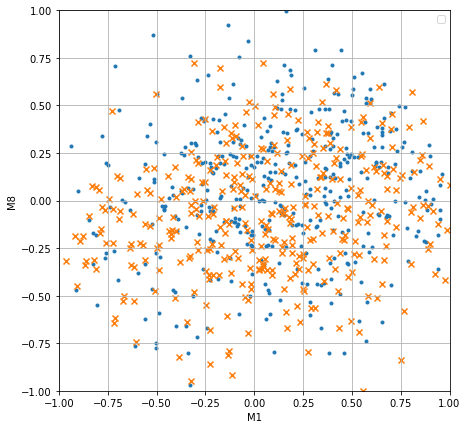

No handles with labels found to put in legend.


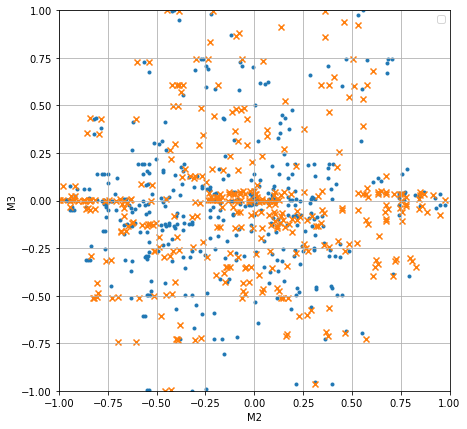

No handles with labels found to put in legend.


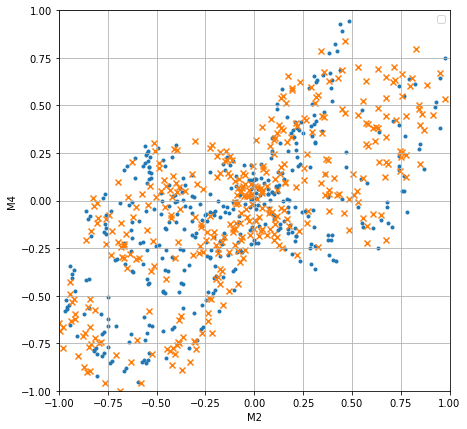

No handles with labels found to put in legend.


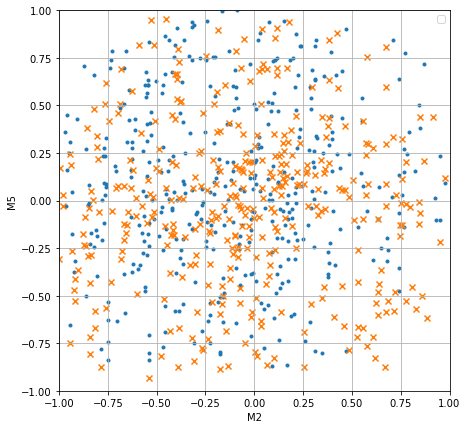

No handles with labels found to put in legend.


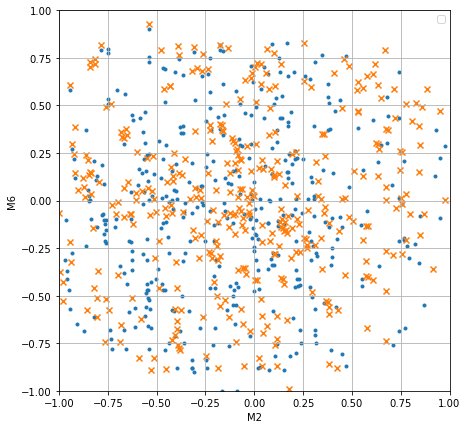

No handles with labels found to put in legend.


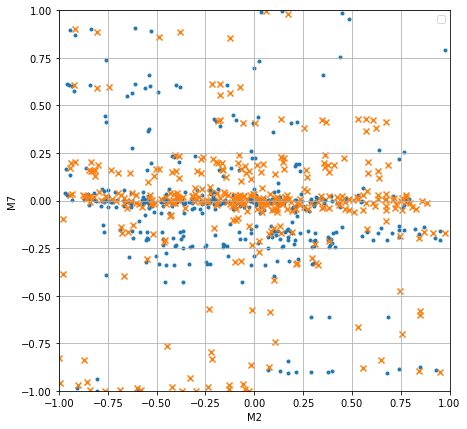

No handles with labels found to put in legend.


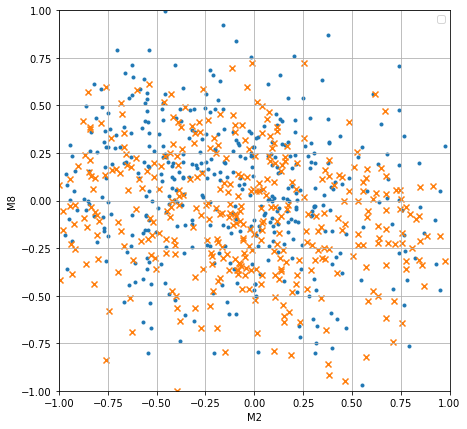

No handles with labels found to put in legend.


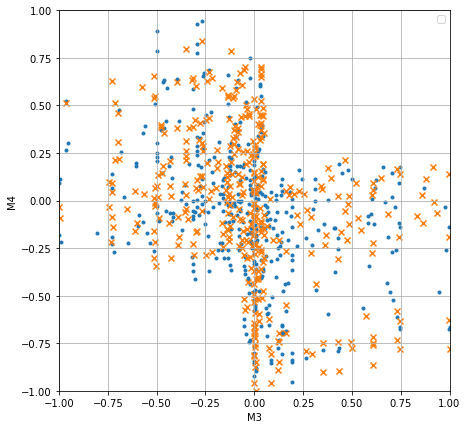

No handles with labels found to put in legend.


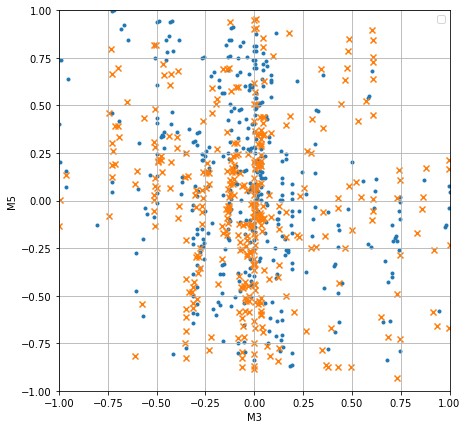

No handles with labels found to put in legend.


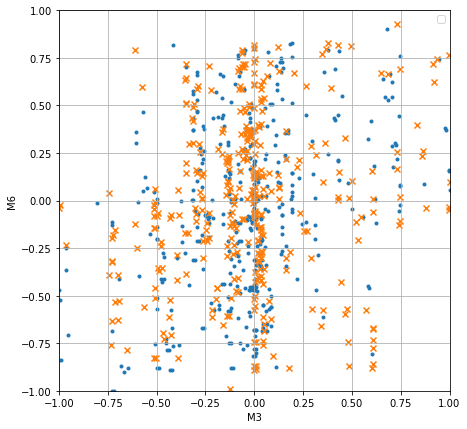

No handles with labels found to put in legend.


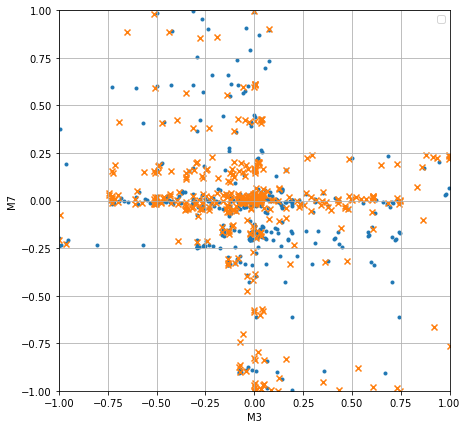

No handles with labels found to put in legend.


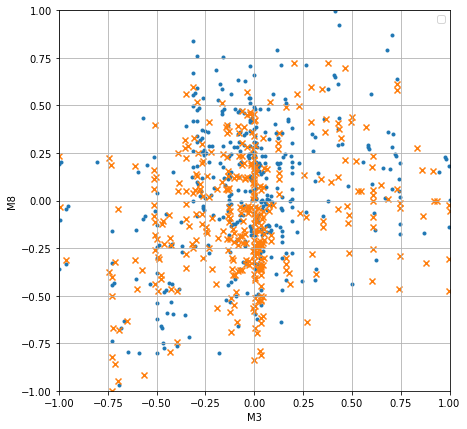

No handles with labels found to put in legend.


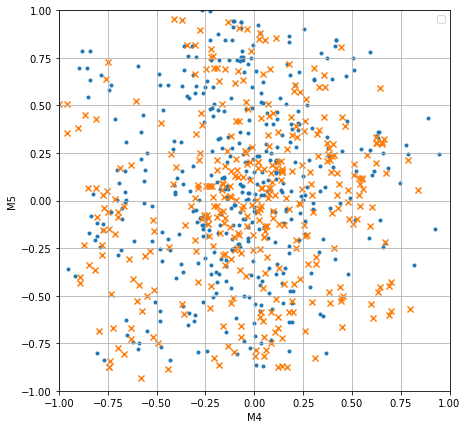

No handles with labels found to put in legend.


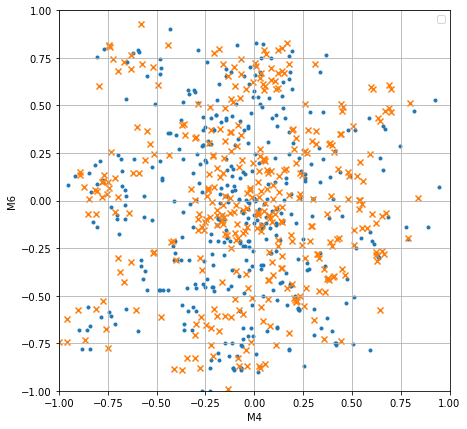

No handles with labels found to put in legend.


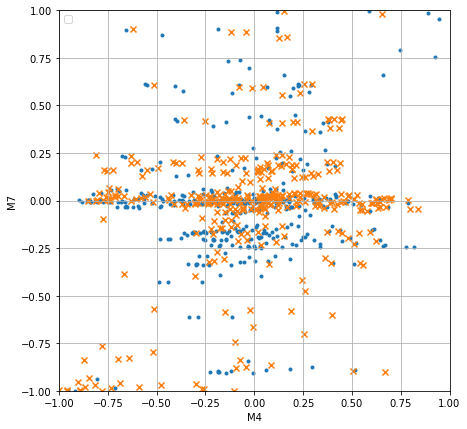

No handles with labels found to put in legend.


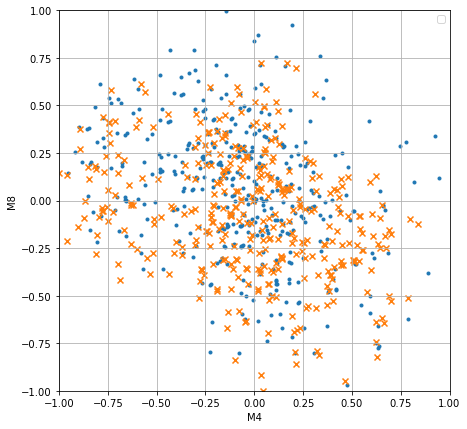

No handles with labels found to put in legend.


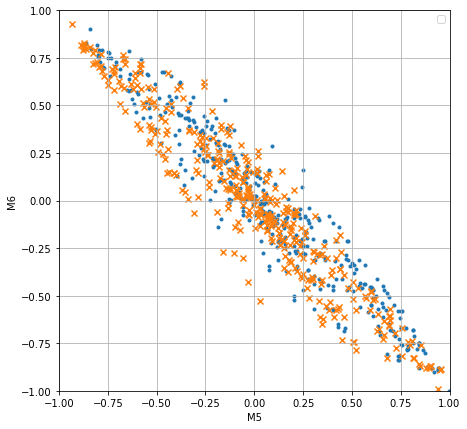

No handles with labels found to put in legend.


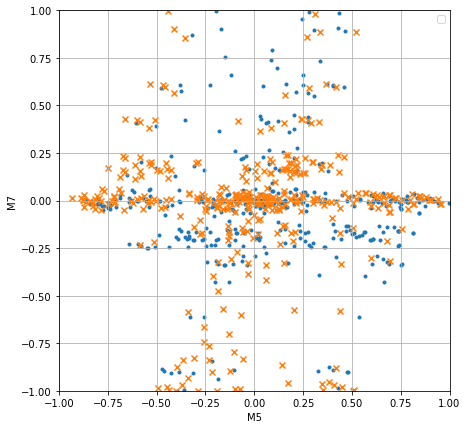

No handles with labels found to put in legend.


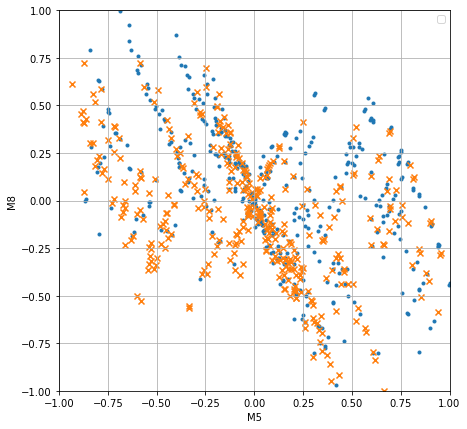

No handles with labels found to put in legend.


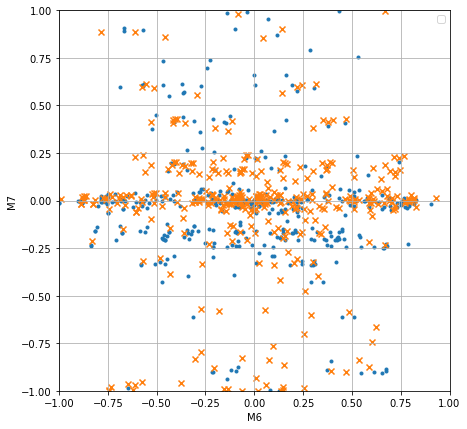

No handles with labels found to put in legend.


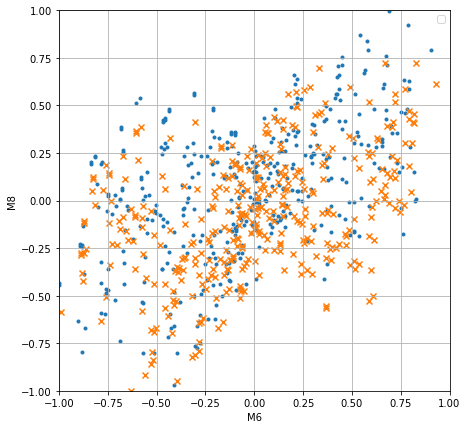

No handles with labels found to put in legend.


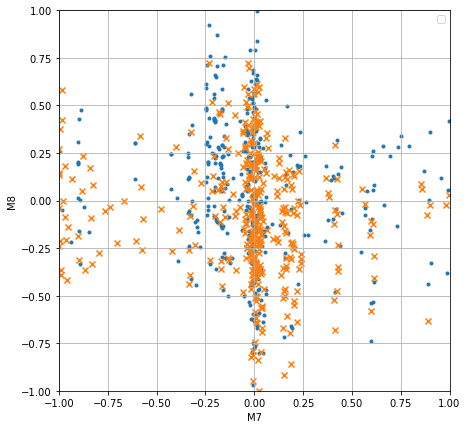

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

X1 = X[y==1]
X0 = X[y==-1]

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show()
        

## 3.Разделение выборки на тестувую и обучающую

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  
X_train, y_train


(           M1        M2        M3        M4        M5        M6        M7  \
 240  0.164740 -0.316209 -0.498829 -0.067870  0.940148 -0.882473 -0.012021   
 303 -0.178448  0.210244 -0.024122 -0.211603  0.595076 -0.456815 -0.206953   
 518  0.073919 -0.003780 -0.073701  0.107901 -0.057895  0.099868 -0.291276   
 272  0.501670 -0.625117 -0.315986 -0.372947  0.308157 -0.310455 -0.003407   
 118  0.387737 -0.537143 -0.271363  0.177327 -0.238393  0.243892 -0.039075   
 ..        ...       ...       ...       ...       ...       ...       ...   
 763  0.210627 -0.300741 -0.551231 -0.171828 -0.071572  0.065221  0.001327   
 192  0.408037 -0.512859 -0.266391  0.302528 -0.061940  0.008034  0.128235   
 629 -0.155951  0.359797  0.998840  0.140584  0.164308 -0.032198  0.237335   
 559  0.055060 -0.024310  0.034804 -0.152354  0.116269 -0.095533  0.010546   
 684 -0.557738  0.312665 -0.965818  0.511066  0.133953 -0.231953 -0.228421   
 
            M8  
 240 -0.246149  
 303  0.422478  
 518 -0.102

### проверка разделения выборок

In [181]:
X_train_SVC, y_train_SVC=X_train, y_train
X_train_SVC, y_train_SVC

(           M1        M2        M3        M4        M5        M6        M7  \
 240  0.164740 -0.316209 -0.498829 -0.067870  0.940148 -0.882473 -0.012021   
 303 -0.178448  0.210244 -0.024122 -0.211603  0.595076 -0.456815 -0.206953   
 518  0.073919 -0.003780 -0.073701  0.107901 -0.057895  0.099868 -0.291276   
 272  0.501670 -0.625117 -0.315986 -0.372947  0.308157 -0.310455 -0.003407   
 118  0.387737 -0.537143 -0.271363  0.177327 -0.238393  0.243892 -0.039075   
 ..        ...       ...       ...       ...       ...       ...       ...   
 763  0.210627 -0.300741 -0.551231 -0.171828 -0.071572  0.065221  0.001327   
 192  0.408037 -0.512859 -0.266391  0.302528 -0.061940  0.008034  0.128235   
 629 -0.155951  0.359797  0.998840  0.140584  0.164308 -0.032198  0.237335   
 559  0.055060 -0.024310  0.034804 -0.152354  0.116269 -0.095533  0.010546   
 684 -0.557738  0.312665 -0.965818  0.511066  0.133953 -0.231953 -0.228421   
 
            M8  
 240 -0.246149  
 303  0.422478  
 518 -0.102

In [182]:
X_train_LDA, y_train_LDA=X_train, y_train
X_train_LDA, y_train_LDA

(           M1        M2        M3        M4        M5        M6        M7  \
 240  0.164740 -0.316209 -0.498829 -0.067870  0.940148 -0.882473 -0.012021   
 303 -0.178448  0.210244 -0.024122 -0.211603  0.595076 -0.456815 -0.206953   
 518  0.073919 -0.003780 -0.073701  0.107901 -0.057895  0.099868 -0.291276   
 272  0.501670 -0.625117 -0.315986 -0.372947  0.308157 -0.310455 -0.003407   
 118  0.387737 -0.537143 -0.271363  0.177327 -0.238393  0.243892 -0.039075   
 ..        ...       ...       ...       ...       ...       ...       ...   
 763  0.210627 -0.300741 -0.551231 -0.171828 -0.071572  0.065221  0.001327   
 192  0.408037 -0.512859 -0.266391  0.302528 -0.061940  0.008034  0.128235   
 629 -0.155951  0.359797  0.998840  0.140584  0.164308 -0.032198  0.237335   
 559  0.055060 -0.024310  0.034804 -0.152354  0.116269 -0.095533  0.010546   
 684 -0.557738  0.312665 -0.965818  0.511066  0.133953 -0.231953 -0.228421   
 
            M8  
 240 -0.246149  
 303  0.422478  
 518 -0.102

In [183]:
X_test_SVC, y_test_SVC=X_test, y_test
X_test_SVC, y_test_SVC

(           M1        M2        M3        M4        M5        M6        M7  \
 699 -0.524938  0.711827 -0.385582  0.418491  0.843726 -0.759384  0.025872   
 327  0.806258 -0.804267  0.001160 -0.920360 -0.396234  0.127363 -0.999843   
 210  0.394955 -0.493827 -0.263895  0.278119  0.214740 -0.357268  0.568638   
 14   0.026352  0.135916  0.030041 -0.039095  0.189546 -0.141041 -0.171227   
 413 -0.225015  0.376663 -0.710954  0.211934  0.390265 -0.530750  0.186794   
 ..        ...       ...       ...       ...       ...       ...       ...   
 52  -0.021320 -0.043563 -0.347542 -0.043660  0.250828 -0.386701  0.147028   
 318  1.000000 -1.000000  0.000944 -0.641059 -0.306658 -0.063964 -0.827128   
 602  0.074171  0.031204  0.616628  0.067171  0.050249  0.010109 -0.065086   
 494  0.280913 -0.204316  0.443297 -0.166088  0.507079 -0.429867 -0.144310   
 352 -0.692165  0.830505 -0.350512  0.795443 -0.571382  0.512586 -0.047026   
 
            M8  
 699 -0.463254  
 327  0.252639  
 210 -0.040

In [184]:
X_test_LDA, y_test_LDA=X_test, y_test
X_test_LDA, y_test_LDA

(           M1        M2        M3        M4        M5        M6        M7  \
 699 -0.524938  0.711827 -0.385582  0.418491  0.843726 -0.759384  0.025872   
 327  0.806258 -0.804267  0.001160 -0.920360 -0.396234  0.127363 -0.999843   
 210  0.394955 -0.493827 -0.263895  0.278119  0.214740 -0.357268  0.568638   
 14   0.026352  0.135916  0.030041 -0.039095  0.189546 -0.141041 -0.171227   
 413 -0.225015  0.376663 -0.710954  0.211934  0.390265 -0.530750  0.186794   
 ..        ...       ...       ...       ...       ...       ...       ...   
 52  -0.021320 -0.043563 -0.347542 -0.043660  0.250828 -0.386701  0.147028   
 318  1.000000 -1.000000  0.000944 -0.641059 -0.306658 -0.063964 -0.827128   
 602  0.074171  0.031204  0.616628  0.067171  0.050249  0.010109 -0.065086   
 494  0.280913 -0.204316  0.443297 -0.166088  0.507079 -0.429867 -0.144310   
 352 -0.692165  0.830505 -0.350512  0.795443 -0.571382  0.512586 -0.047026   
 
            M8  
 699 -0.463254  
 327  0.252639  
 210 -0.040

# Реализация метода опорных векторов

## Выполнение SVM

In [185]:
from sklearn.svm import SVC 
#экземпляр классификатора
svc_model = SVC(kernel = 'linear')
#обучения классификатора
svc_model.fit(X_train_SVC, y_train_SVC)
SVC_prediction = svc_model.predict(X_test_SVC) 
SVC_prediction


array([ 1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1], dtype=int64)

In [186]:
svc_model.coef_ # Коэффициенты разделяющей гиперплоскости

array([[ 0.89837004,  0.51156555, -0.31804054,  0.14174115,  2.90595296,
         1.83196803,  0.63728586,  2.13616167]])

<img src="form.png">


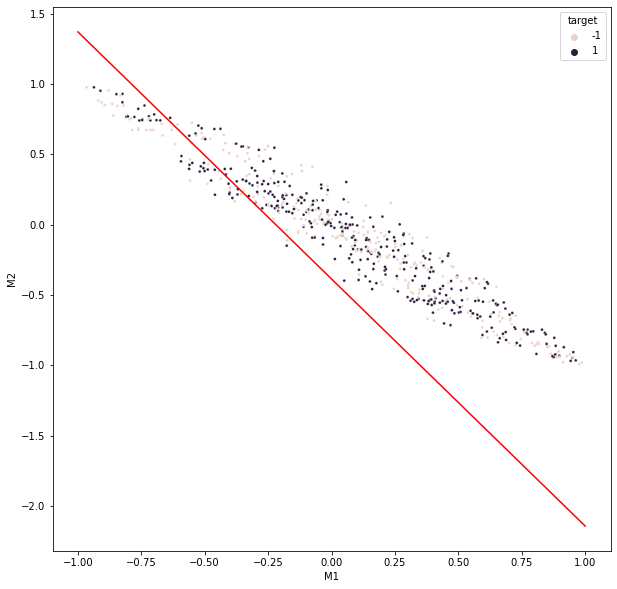

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))


sns.scatterplot(x=X_train_SVC.iloc[:,0], 
                y=X_train_SVC.iloc[:,1], 
                hue=y_train_SVC, 
                s=8)

w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='r')

## Расчет оптимальной стратегии по результатам обучения методом SVM

In [188]:
lamb_method=svc_model.coef_[0]
#lamb=[alpha_j,alpha_a,beta_j,beta_a,delta_j,delta_a,gamma_j,gamma_a]

def calc_A_j(lamb):
    return (sigma1*lamb[0]-sigma2*lamb[6])/(2*lamb[4])-C0

def calc_B_j(lamb):
    return -sigma2*lamb[6]/(2*lamb[4]+2*(2*pi)**2*lamb[2]) 

def calc_A_a(lamb):
    return (sigma1*lamb[1]-sigma2*lamb[7])/(2*lamb[5])-C0

def calc_B_a(lamb):
    return -sigma2*lamb[7]/(2*lamb[5]+2*(2*pi)**2*lamb[3])  

A_j_method, B_j_method= calc_A_j(lamb_method),calc_B_j(lamb_method)
A_a_method, B_a_method= calc_A_a(lamb_method),calc_B_a(lamb_method)
A_j, B_j= calc_A_j(lamb),calc_B_j(lamb)
A_a, B_a= calc_A_a(lamb),calc_B_a(lamb)

print('Вычисленные стратегий A и B по коэффициентам, полученным методом опорных векторов:\n', A_j_method, B_j_method, A_a_method, B_a_method)
print('Вычисленные стратегий A и B по коэффициентам, которые были даны:\n', A_j, B_j, A_a, B_a)


Вычисленные стратегий A и B по коэффициентам, полученным методом опорных векторов:
 -69.95507770014673 0.03302073038363753 -70.4434018742139 -0.14379728787711216
Вычисленные стратегий A и B по коэффициентам, которые были даны:
 -22.499999999999993 -0.9166975755058742 -53.33333333333333 -31.765756102183143


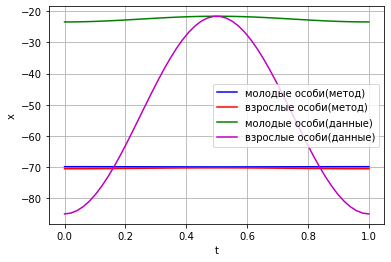

In [189]:
t=np.linspace(0,1)
x_j_method=A_j_method+B_j_method*np.cos(2*pi*t)
x_a_method=A_a_method+B_a_method*np.cos(2*pi*t)
x_j=A_j+B_j*np.cos(2*pi*t)
x_a=A_a+B_a*np.cos(2*pi*t)
plt.xlabel("t") 
plt.ylabel("x")
plt.grid()  
plt.plot(t,x_j_method,label='молодые особи(метод)',color='b')
plt.plot(t,x_a_method,label='взрослые особи(метод)',color='r')
plt.plot(t,x_j,label='молодые особи(данные)', color='g')
plt.plot(t,x_a,label='взрослые особи(данные)',color='m')
plt.legend()
plt.show()

# Реализация метода дискриминанта Фишера

## Масштабирование объектов

In [192]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train_LDA = sc.fit_transform(X_train_LDA)

# X_test_LDA = sc.transform(X_test_LDA)

## Выполнение LDA

In [193]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.metrics import accuracy_score

# lda_model = LDA(n_components=1)
# X_train_LDA = lda_model.fit_transform(X_train_LDA, y_train_LDA)
# X_test_LDA = lda_model.transform(X_test_LDA)
# LDA_prediction= lda_model.predict(X_test_LDA)
# LDA_prediction

from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train_LDA, y_train_LDA)
LDA_prediction = lda_model.predict(X_test_LDA) 
LDA_prediction

array([ 1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1], dtype=int64)

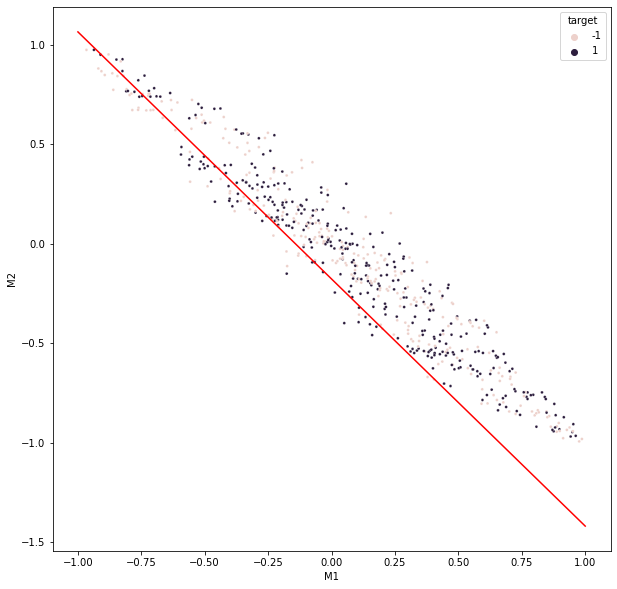

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.scatterplot(x=X_train_LDA.iloc[:,0], 
                y=X_train_LDA.iloc[:,1], 
                hue=y_train_LDA, 
                s=8)
w = lda_model.coef_[0]
b = lda_model.intercept_[0]
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='r')

In [199]:
lda_model.coef_

array([[ 1.01678031,  0.81835835, -0.53170111, -0.06669944,  3.75466481,
         2.81126296,  0.66740635,  1.83650143]])

## Расчет оптимальной стратегии по результатам обучения методом LDA

In [201]:
lamb_method=lda_model.coef_[0]
#lamb=[alpha_j,alpha_a,beta_j,beta_a,delta_j,delta_a,gamma_j,gamma_a]

def calc_A_j(lamb):
    return (sigma1*lamb[0]-sigma2*lamb[6])/(2*lamb[4])-C0

def calc_B_j(lamb):
    return -sigma2*lamb[6]/(2*lamb[4]+2*(2*pi)**2*lamb[2]) 

def calc_A_a(lamb):
    return (sigma1*lamb[1]-sigma2*lamb[7])/(2*lamb[5])-C0

def calc_B_a(lamb):
    return -sigma2*lamb[7]/(2*lamb[5]+2*(2*pi)**2*lamb[3])  

A_j_method, B_j_method= calc_A_j(lamb_method),calc_B_j(lamb_method)
A_a_method, B_a_method= calc_A_a(lamb_method),calc_B_a(lamb_method)
A_j, B_j= calc_A_j(lamb),calc_B_j(lamb)
A_a, B_a= calc_A_a(lamb),calc_B_a(lamb)

print('Вычисленные стратегий A и B по коэффициентам, полученным методом дискриминанта Фишера:\n', A_j_method, B_j_method, A_a_method, B_a_method)
print('Вычисленные стратегий A и B по коэффициентам, которые были даны:\n', A_j, B_j, A_a, B_a)


Вычисленные стратегий A и B по коэффициентам, полученным методом дискриминанта Фишера:
 -69.95347468040788 0.019360764497559895 -70.18108286236996 -5.156547500703531
Вычисленные стратегий A и B по коэффициентам, которые были даны:
 -22.499999999999993 -0.9166975755058742 -53.33333333333333 -31.765756102183143


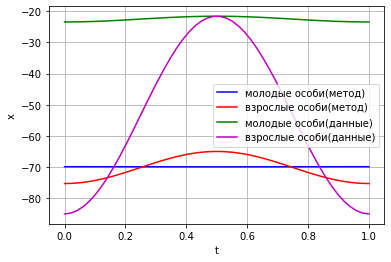

In [202]:
t=np.linspace(0,1)
x_j_method=A_j_method+B_j_method*np.cos(2*pi*t)
x_a_method=A_a_method+B_a_method*np.cos(2*pi*t)
x_j=A_j+B_j*np.cos(2*pi*t)
x_a=A_a+B_a*np.cos(2*pi*t)
plt.xlabel("t") 
plt.ylabel("x")
plt.grid()  
plt.plot(t,x_j_method,label='молодые особи(метод)',color='b')
plt.plot(t,x_a_method,label='взрослые особи(метод)',color='r')
plt.plot(t,x_j,label='молодые особи(данные)', color='g')
plt.plot(t,x_a,label='взрослые особи(данные)',color='m')
plt.legend()
plt.show()

# Сравнение методов SVM и LDA

In [197]:
# Оценка точности — простейший вариант оценки работы классификатора
from sklearn.metrics import accuracy_score
print(accuracy_score(SVC_prediction, y_test_SVC))
print(accuracy_score(LDA_prediction, y_test_LDA))

0.6538461538461539
0.6217948717948718
